# Foundations of Data Mining: Assignment 4

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [10]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## Backpropagation (3 points)

**Solution**

![Neuron](ex1.png)

- We choose Loss function: 
    - $L(x, y; w) = \frac{1}{2}(o_\theta - y)^2$ 
- $\phi$ is ReLU=max(q,0) here

- Forward 1:
$$r=\phi (q_0)=\phi(w_0x_0)=1$$
$$o=\phi(q_1)=\phi(w_1r)=2$$

- Backward 1:
$$w_1=w_1-\alpha \frac{\partial L}{\partial w_1}=w_1-\alpha \frac{\partial L}{\partial o}\frac{\partial o}{\partial q_1}\frac{\partial q_1}{\partial w_1}=w_1-\alpha\cdot x_0(o-y_0)=2-0.1*1*0=2$$

$$w_0=w_0-\alpha \frac{\partial L}{\partial w_0}=w_0-\alpha \frac{\partial L}{\partial o}\frac{\partial o}{\partial w_0}=w_0-0=1$$

Since $o_\theta=y$ for first point, weights don't update.


- Forward 2:
$$r=\phi(q_0)=\phi(w_0x_1)=2$$
$$o=\phi(q_1)=\phi(w_1r)=4$$


- Backward 2:
$$w_1=w_1-\alpha \frac{\partial L}{\partial w_1}=w_1-\alpha \frac{\partial L}{\partial o}\frac{\partial o}{\partial q_1}\frac{\partial q_1}{\partial w_1}=w_1-\alpha\cdot x_1(o-y_1)=2-0.1*2*1=1.8$$
$$w_0=w_0-\alpha \frac{\partial L}{\partial w_1}\frac{\partial w_1}{\partial w_0}=w_0-\alpha \frac{\partial L}{\partial q_1}\frac{\partial q_1}{\partial r}\frac{\partial r}{\partial q_0}\frac{\partial q_0}{\partial w_0}=w_0-\alpha *x_1*w_1(o-y_1)=0.6$$

$o_\theta\neq y$ for second point, so weights update after backpropa.

## Training Deep Models (3 points)

The model in the example code below performs poorly as its depth increases. Train this model on the MNIST digit detection task. 

Examine its training performance by gradually increasing its depth:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Modify the model such that you improve its performance when its depth increases. Train the new model again for the different depths:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Submit an explanation for the limitation of the original model. Explain your modification. 
Submit your code and 6 plots (can be overlaid) for the training performance of both models with different depths. 



In [11]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
nb_epoch = 10

In [12]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [4]:
def train_model(number_hidden_layers, activation):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation=activation))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512))
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1

    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=0, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    
    return score[0], score[1], history

def run_model(activation):
    for num_layer in [1, 2, 3]:
        test_score, test_accuracy, history = train_model(num_layer,activation)
        print('Depth:', num_layer)
        print('Test score:', test_score)
        print('Test accuracy:', test_accuracy)
        
        plt.subplot(1, 3, num_layer)
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy with depth: %d' % (num_layer))
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Depth: 1
Test score: 0.466248050857
Test accuracy: 0.8811
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
______

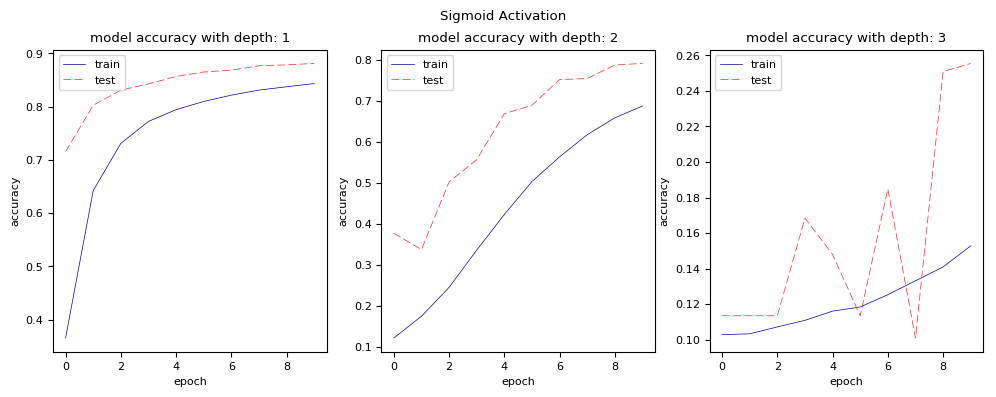

In [5]:
plt.figure(figsize=(12, 4))
plt.suptitle('Sigmoid Activation')
run_model('sigmoid')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Depth: 1
Test score: 0.256563024029
Test accuracy: 0.9293
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
______

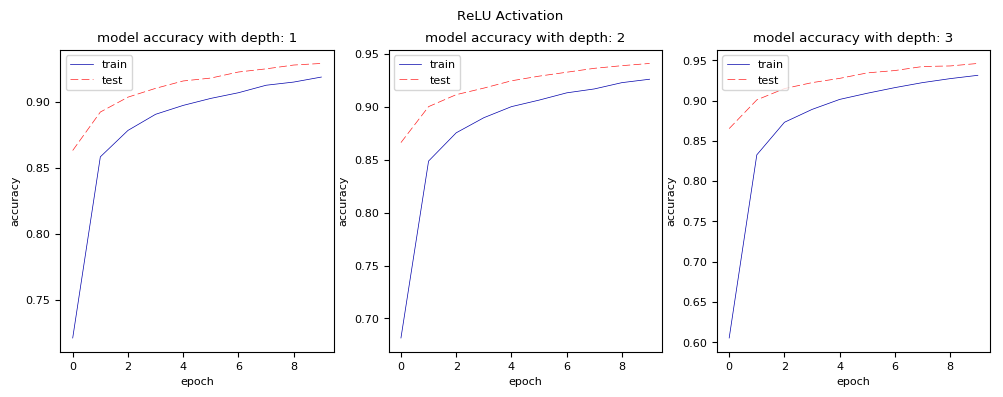

In [20]:
plt.figure(figsize=(12, 4))
plt.suptitle('ReLU Activation')
run_model('relu')
plt.show()

**Solution**

We can conclude from figures above that changing the activation 'sigmoid' to 'ReLU' can modify the results a lot.

Sigmoid activation function is $\frac{1}{1+e^{-w^{T}x}}$, so the gradient calculation of it would be complex. Although it seems good when number of hidden_layer is 1 but when we add more layers, the gradient would vanish or explode thus makes little or too heavy contribution to the network and result in low and unstable accuracy. 

On the contrary, the ReLU is a max function: max{0,x}, so we only have gradient 0 or 1, which is simple to computate. And without the gradient vanishing and exploding problems, the accuracy will be higher with the number of layers increasing.

## Convolutional Neural Networks for Filtering (2 points)

**Solution**

We define the number of layer as 3. Which includes the input layer, the sepia combine Gaussian blurring layer and the output layer.

The image consists of $128\times128$ pixels. The color of each point is defined by a 3D vector, and the value of each axis of the vector represents the RGB value repectively. The middle layer is achieved by a $3\times Conv.\times5\times5\times3$ convolution. The neuron computes the RGB values respectively  with both sepia effect and Gaussian blurring effect. 

As a discretized version of the filter is given, which can be represent by a matrix like below:
$G = 1/273\times 
\begin{bmatrix}
    1 & 4 & 7 & 4 & 1 \\
    4 & 16 & 26 & 16 & 4 \\
    7 & 26 & 41 & 26 & 7 \\
    4 & 16 & 26 & 16 & 4 \\
    1 & 4 & 7 & 4 & 1 \\
\end{bmatrix}
$

Below shows how to apply both effects to the R value:

$R(i,j)=\sum_{m=1}^{5}\sum_{n=1}^{5}((R_{(i+m-1,j+n-1)} * .393) + (G_{(i+m-1,j+n-1)} *.769) + (B_{(i+m-1,j+n-1)} * .189))\times G(m,n)$  $i,j$ is from 1 to 124.

Do the similar steps to G and B values. we can get an output image of size $124\times124\times3$.

$G(i,j)=\sum_{m=1}^{5}\sum_{n=1}^{5}((R_{(i+m-1,j+n-1)} * .349) + (G_{(i+m-1,j+n-1)} *.686) + (B_{(i+m-1,j+n-1)} * .168))\times G(m,n)$  $i,j$ is from 1 to 124.

$B(i,j)=\sum_{m=1}^{5}\sum_{n=1}^{5}((R_{(i+m-1,j+n-1)} * .272) + (G_{(i+m-1,j+n-1)} *.534) + (B_{(i+m-1,j+n-1)} * .131))\times G(m,n)$  $i,j$ is from 1 to 124.

- The definition of the architecture of the CNN:
  - Number of the layers:
  The number of layers is 3, which includes the input layer, the middle layer and output layer.
  - Number of filters of middle layer is 3
  - Shape of filter : $5\times5\times3$
- Padding size: 0, Stride: 1
- Dimension of the output image: $124\times124\times3$
  

## Model Design (2 Points)

Various decisions need to be made in a modeling process to address specific properties of the data and the modeling goal. In this task, you are given a description of a data structure and a goal for which you need to design a model. 

Produce a figure depicting your model. Briefly explain the figure and justify all decisions made in the modeling process. In detail, describe at least: 
- Input data format
- Number of layers
- Type of layers (Dense, Recurrent, Convolutional - 1D, 2D, 3D)
- Regularization
- Model output
- Loss function

The training and execution procedures for the model may differ, so you can use different descriptions for both. 

*Data and goal description:*

The goal of this task is to generate captions for short video clips. 

The video data is structured as sequences of color images. The model needs to be able to process a number of consecutive images that form a short video clip. The training data consists of video clips (few seconds) and a short caption (5-10 words). 

For simplicity, the accuracy of the model is evaluated on the exact prediction of the caption. In other words, the model needs to produce correctly the specific words in a specific order for each video. 

## MNIST Calculator (5 points)

In [35]:
from __future__ import print_function
from keras.models import Sequential
from keras.engine.training import _slice_arrays
from keras.layers import Activation, TimeDistributed, Dense, RepeatVector, recurrent
import numpy as np
from six.moves import range
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


DIGITS = 3
MAXLEN = DIGITS + 1 + DIGITS
chars = '0123456789+ '
RNN = recurrent.LSTM
HIDDEN_SIZE = 256
BATCH_SIZE = 512
LAYERS = 2
TRAINING_SIZE = 50000

class CharacterTable(object):
    def __init__(self, chars, maxlen):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))
        self.maxlen = maxlen

    def encode(self, C, maxlen=None):
        maxlen = maxlen if maxlen else self.maxlen
        X = np.zeros((maxlen, len(self.chars)))
        for i, c in enumerate(C):
            X[i, self.char_indices[c]] = 1
        return X

    def decode(self, X, calc_argmax=True):
        if calc_argmax:
            X = X.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in X)
    
class colors:
    ok = '\033[92m'
    fail = '\033[91m'
    close = '\033[0m'

In [36]:
ctable = CharacterTable(chars, MAXLEN)

In [37]:
img_rows = img_cols = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
y_train1 = y_train

In [40]:
def random_question():
    f = lambda: int(''.join(np.random.choice(list('0123456789')) for i in range(np.random.randint(1, DIGITS + 1))))
    a, b = f(), f()

    query = '{}+{}'.format(a, b)
    ans = str(a + b)

    query += ' ' * (MAXLEN - len(query))
    ans += ' ' * (DIGITS + 1 - len(ans))

    return query, ans

def encode_question(question, output=None):
    if output is None:
        i = 0
        output = np.zeros([1, MAXLEN] + list(input_shape), dtype=x_train.dtype)
        for j, char in enumerate(question):
            if char in '0123456789':
                orin = None
                while orin is None:
                    num = np.random.choice(y_train1.shape[0])
                    if y_train1[num] == int(char):
                        orin = x_train[num]
            else:
                orin = 255 * np.random.random(input_shape)

            output[i,j] = orin
    else:
        for j, char in enumerate(question):
            if char in '0123456789':
                orin = None
                while orin is None:
                    num = np.random.choice(y_train1.shape[0])
                    if y_train1[num] == int(char):
                        orin = x_train[num]
            else:
                orin = 255 * np.random.random(input_shape)

            output[j] = orin
    return output

In [41]:
X = np.zeros([TRAINING_SIZE, MAXLEN] + list(input_shape), dtype=x_train.dtype)
y = np.zeros((TRAINING_SIZE, DIGITS + 1, len(chars)), dtype=np.bool)


for i in range(TRAINING_SIZE):
    question, answer = random_question()
    y[i] = ctable.encode(answer, maxlen=DIGITS + 1)
    X[i] = encode_question(question, X[i])

# Shuffle (X, y) in unison as the later parts of X will almost all be larger digits
indices = np.arange(len(y))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

split_at = int(X.shape[0] * 0.9)
(X_train, X_val) = (_slice_arrays(X, 0, split_at), _slice_arrays(X, split_at))
(y_train, y_val) = (y[:split_at], y[split_at:])

In [42]:
model = Sequential()
model.add(TimeDistributed(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',strides=(3,3)),
                 input_shape=X_train.shape[1:]))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(Dropout(0.25))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu',strides=(1,1))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(Dropout(0.5))
model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(128, activation='relu')))

model.add(RNN(HIDDEN_SIZE))
model.add(RepeatVector(DIGITS + 1))
for _ in range(LAYERS):
    model.add(RNN(HIDDEN_SIZE, return_sequences=True))

# For each of step of the output sequence, decide which character should be chosen
model.add(TimeDistributed(Dense(len(chars))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [43]:
for iteration in range(1, 10):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              batch_size=BATCH_SIZE, epochs=5, verbose=2)

    for i in range(10):
        question, answer = random_question()
        out = encode_question(question)
        preds = model.predict_classes(out, verbose=0)
        guess = ctable.decode(preds[0], calc_argmax=False)
        print('Q', question)
        print('T', answer)
        print(colors.ok + '☑' + colors.close if answer == guess else colors.fail + '☒' + colors.close, guess)
        print('---')


--------------------------------------------------
Iteration 1
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
111s - loss: 1.7623 - acc: 0.4094 - val_loss: 1.5621 - val_acc: 0.4361
Epoch 2/5
108s - loss: 1.5418 - acc: 0.4505 - val_loss: 1.5156 - val_acc: 0.4544
Epoch 3/5
113s - loss: 1.5180 - acc: 0.4525 - val_loss: 1.4950 - val_acc: 0.4581
Epoch 4/5
114s - loss: 1.5008 - acc: 0.4571 - val_loss: 1.4631 - val_acc: 0.4666
Epoch 5/5
117s - loss: 1.4619 - acc: 0.4663 - val_loss: 1.3843 - val_acc: 0.4885


Q 8+9    
T 17  
☒ 13  
---
Q 2+69   
T 71  
☒ 68  
---
Q 500+53 
T 553 
☒ 558 
---
Q 9+4    
T 13  
☒ 15  
---
Q 778+77 
T 855 
☒ 908 
---
Q 114+877
T 991 
☒ 111 
---
Q 99+12  
T 111 
☒ 12  
---
Q 6+4    
T 10  
☒ 1   
---
Q 5+995  
T 1000
☒ 908 
---
Q 2+4    
T 6   
☒ 1   
---

--------------------------------------------------
Iteration 2
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
112s - loss: 1.3808 - acc: 0.4906 - val_loss: 1.2925 - val_acc: 0.5095
Epoch 2/5
109s - loss: 1.3092 - acc: 0.5132 - val_loss: 1.1946 - val_acc: 0.5571
Epoch 3/5
109s - loss: 1.1999 - acc: 0.5530 - val_loss: 1.0114 - val_acc: 0.6270
Epoch 4/5
108s - loss: 1.0816 - acc: 0.6063 - val_loss: 0.8796 - val_acc: 0.6932
Epoch 5/5
109s - loss: 0.9815 - acc: 0.6535 - val_loss: 0.7769 - val_acc: 0.7422


Q 36+5   
T 41  
☒ 50  
---
Q 952+69 
T 1021
☒ 1011
---
Q 104+4  
T 108 
☒ 118 
---
Q 412+423
T 835 
☒ 645 
---
Q 29+7   
T 36  
☑ 36  
---
Q 0+48   
T 48  
☒ 58  
---
Q 6+8    
T 14  
☑ 14  
---
Q 534+0  
T 534 
☒ 434 
---
Q 2+40   
T 42  
☑ 42  
---
Q 98+12  
T 110 
☒ 100 
---

--------------------------------------------------
Iteration 3
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
113s - loss: 0.8899 - acc: 0.7014 - val_loss: 0.6701 - val_acc: 0.7941
Epoch 2/5
757s - loss: 0.7994 - acc: 0.7408 - val_loss: 0.5679 - val_acc: 0.8357
Epoch 3/5
113s - loss: 0.7312 - acc: 0.7680 - val_loss: 0.5123 - val_acc: 0.8515
Epoch 4/5
115s - loss: 0.6747 - acc: 0.7899 - val_loss: 0.4494 - val_acc: 0.8702
Epoch 5/5
114s - loss: 0.6237 - acc: 0.8073 - val_loss: 0.4324 - val_acc: 0.8698


Q 18+53  
T 71  
☑ 71  
---
Q 82+78  
T 160 
☑ 160 
---
Q 11+2   
T 13  
☑ 13  
---
Q 435+69 
T 504 
☒ 404 
---
Q 2+1    
T 3   
☒ 2   
---
Q 73+2   
T 75  
☑ 75  
---
Q 48+794 
T 842 
☒ 830 
---
Q 31+11  
T 42  
☑ 42  
---
Q 169+543
T 712 
☒ 8022
---
Q 943+392
T 1335
☒ 1315
---

--------------------------------------------------
Iteration 4
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
115s - loss: 0.5910 - acc: 0.8202 - val_loss: 0.3852 - val_acc: 0.8902
Epoch 2/5
117s - loss: 0.5602 - acc: 0.8309 - val_loss: 0.3631 - val_acc: 0.8930
Epoch 3/5
121s - loss: 0.5280 - acc: 0.8418 - val_loss: 0.3308 - val_acc: 0.9056
Epoch 4/5
125s - loss: 0.5058 - acc: 0.8493 - val_loss: 0.3167 - val_acc: 0.9117
Epoch 5/5
126s - loss: 0.4895 - acc: 0.8552 - val_loss: 0.3136 - val_acc: 0.9130


Q 8+20   
T 28  
☑ 28  
---
Q 266+493
T 759 
☒ 749 
---
Q 478+66 
T 544 
☑ 544 
---
Q 3+763  
T 766 
☑ 766 
---
Q 932+74 
T 1006
☒ 100 
---
Q 73+15  
T 88  
☑ 88  
---
Q 97+187 
T 284 
☒ 254 
---
Q 4+648  
T 652 
☑ 652 
---
Q 50+611 
T 661 
☑ 661 
---
Q 991+9  
T 1000
☑ 1000
---

--------------------------------------------------
Iteration 5
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
119s - loss: 0.4715 - acc: 0.8621 - val_loss: 0.2944 - val_acc: 0.9171
Epoch 2/5
117s - loss: 0.4613 - acc: 0.8655 - val_loss: 0.2739 - val_acc: 0.9216
Epoch 3/5
115s - loss: 0.4422 - acc: 0.8712 - val_loss: 0.2785 - val_acc: 0.9203
Epoch 4/5
117s - loss: 0.4322 - acc: 0.8744 - val_loss: 0.2659 - val_acc: 0.9254
Epoch 5/5
116s - loss: 0.4224 - acc: 0.8777 - val_loss: 0.2678 - val_acc: 0.9277


Q 53+626 
T 679 
☒ 678 
---
Q 599+1  
T 600 
☑ 600 
---
Q 5+3    
T 8   
☑ 8   
---
Q 25+956 
T 981 
☑ 981 
---
Q 7+78   
T 85  
☑ 85  
---
Q 44+90  
T 134 
☒ 14  
---
Q 381+55 
T 436 
☑ 436 
---
Q 15+91  
T 106 
☑ 106 
---
Q 0+91   
T 91  
☑ 91  
---
Q 7+6    
T 13  
☑ 13  
---

--------------------------------------------------
Iteration 6
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
118s - loss: 0.4133 - acc: 0.8814 - val_loss: 0.2539 - val_acc: 0.9301
Epoch 2/5
120s - loss: 0.4051 - acc: 0.8837 - val_loss: 0.2462 - val_acc: 0.9310
Epoch 3/5
116s - loss: 0.3953 - acc: 0.8873 - val_loss: 0.2383 - val_acc: 0.9353
Epoch 4/5
117s - loss: 0.3881 - acc: 0.8892 - val_loss: 0.2441 - val_acc: 0.9331
Epoch 5/5
125s - loss: 0.3840 - acc: 0.8902 - val_loss: 0.2290 - val_acc: 0.9357


Q 12+587 
T 599 
☒ 699 
---
Q 3+8    
T 11  
☑ 11  
---
Q 934+794
T 1728
☑ 1728
---
Q 0+7    
T 7   
☑ 7   
---
Q 1+6    
T 7   
☑ 7   
---
Q 50+54  
T 104 
☑ 104 
---
Q 42+922 
T 964 
☑ 964 
---
Q 719+59 
T 778 
☑ 778 
---
Q 377+155
T 532 
☒ 432 
---
Q 78+5   
T 83  
☒ 13  
---

--------------------------------------------------
Iteration 7
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
119s - loss: 0.3750 - acc: 0.8936 - val_loss: 0.2273 - val_acc: 0.9394
Epoch 2/5
117s - loss: 0.3733 - acc: 0.8946 - val_loss: 0.2287 - val_acc: 0.9368
Epoch 3/5
115s - loss: 0.3637 - acc: 0.8969 - val_loss: 0.2147 - val_acc: 0.9407
Epoch 4/5
115s - loss: 0.3568 - acc: 0.8993 - val_loss: 0.2130 - val_acc: 0.9438
Epoch 5/5
115s - loss: 0.3544 - acc: 0.8995 - val_loss: 0.2221 - val_acc: 0.9406


Q 6+7    
T 13  
☑ 13  
---
Q 667+6  
T 673 
☑ 673 
---
Q 787+17 
T 804 
☒ 704 
---
Q 8+62   
T 70  
☑ 70  
---
Q 625+6  
T 631 
☑ 631 
---
Q 35+0   
T 35  
☑ 35  
---
Q 357+9  
T 366 
☒ 361 
---
Q 86+748 
T 834 
☑ 834 
---
Q 98+251 
T 349 
☑ 349 
---
Q 3+300  
T 303 
☑ 303 
---

--------------------------------------------------
Iteration 8
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
119s - loss: 0.3478 - acc: 0.9019 - val_loss: 0.2143 - val_acc: 0.9437
Epoch 2/5
119s - loss: 0.3396 - acc: 0.9044 - val_loss: 0.2142 - val_acc: 0.9439
Epoch 3/5
126s - loss: 0.3418 - acc: 0.9032 - val_loss: 0.2033 - val_acc: 0.9456
Epoch 4/5
122s - loss: 0.3320 - acc: 0.9059 - val_loss: 0.2095 - val_acc: 0.9429
Epoch 5/5
117s - loss: 0.3329 - acc: 0.9050 - val_loss: 0.1952 - val_acc: 0.9467


Q 55+8   
T 63  
☑ 63  
---
Q 1+485  
T 486 
☑ 486 
---
Q 578+53 
T 631 
☑ 631 
---
Q 1+888  
T 889 
☑ 889 
---
Q 18+308 
T 326 
☑ 326 
---
Q 2+971  
T 973 
☑ 973 
---
Q 927+55 
T 982 
☑ 982 
---
Q 89+3   
T 92  
☒ 83  
---
Q 995+80 
T 1075
☒ 1065
---
Q 9+84   
T 93  
☑ 93  
---

--------------------------------------------------
Iteration 9
Train on 45000 samples, validate on 5000 samples
Epoch 1/5
123s - loss: 0.3280 - acc: 0.9080 - val_loss: 0.1959 - val_acc: 0.9484
Epoch 2/5
117s - loss: 0.3259 - acc: 0.9083 - val_loss: 0.1978 - val_acc: 0.9467
Epoch 3/5
121s - loss: 0.3224 - acc: 0.9084 - val_loss: 0.2238 - val_acc: 0.9414
Epoch 4/5
123s - loss: 0.3196 - acc: 0.9096 - val_loss: 0.2033 - val_acc: 0.9468
Epoch 5/5
125s - loss: 0.3151 - acc: 0.9114 - val_loss: 0.1930 - val_acc: 0.9482


Q 89+92  
T 181 
☑ 181 
---
Q 92+91  
T 183 
☑ 183 
---
Q 7+24   
T 31  
☑ 31  
---
Q 97+1   
T 98  
☑ 98  
---
Q 87+83  
T 170 
☑ 170 
---
Q 43+28  
T 71  
☒ 62  
---
Q 89+62  
T 151 
☑ 151 
---
Q 6+39   
T 45  
☑ 45  
---
Q 934+760
T 1694
☑ 1694
---
Q 1+3    
T 4   
☑ 4   
---
